
<table width="100%">
<td style="font-size:45px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Exercise set V
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{\ket{ #1}\bra{#2}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathcal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $
$ \newcommand{\tr}{{\rm Tr}\,} $
$ \newcommand{\boldsig}{\boldsymbol{\sigma}} $
$ \newcommand{\bn}{\boldsymbol{n}}$
$ \newcommand{\boldn}{\boldsymbol{n}} $
$ \newcommand{\Lin}{\hbox{Lin}} $
$ \newcommand{\id}{{\mathbb I}} $

<div class="alert alert-block alert-success">
<b>Exercise 5.1:</b>  
Prove that:
    
$a)$  for any observable $A$,  the expectation value $\lambda_{min}\leq \bra{\psi} E \ket{\psi}  \leq \lambda_{max}$ where $\lambda_{min},\lambda_{max}$ are the smallest and largest eigenvalues of $E$, and $\ket{\psi}$ is any state.

$b)$  for any member  of a POVM, $\{ E_m\}\, ,  m=1,...,r $

-  the eigenvalues of $E_m $ are $\lambda_i \in [0,1]$.

- the following implications are valid for $\mu = 1, 0$
$$
\bra{\psi}E_m\ket{\psi} = \mu ~~~\Leftrightarrow ~~~E_m\ket{\psi} = \mu\ket{\psi}
$$

</div>

<div class="alert alert-block alert-success">
<b>Exercise 5.2:</b> 

Suppose that Alice sends with equal  probability  $1/2$ the states $ \ket{a_\perp} = \ket{1} ,  \ket{b_\perp} =  \frac{\sqrt{3}}{2}\ket{0} + \frac{1}{2}\ket{1}\}$. Write the density operator that Bob uses to describe the statistical mixture. 

Bob tries to identify correctly which state was actually sent first by using the projective measurement $Z = P_0 + P_1$.
Show that only $P_0$ discriminates and that this only occurs with probability 3/8 hence the identification rate is  $37.5\%$.

Then Bob tries to use the triangular POVM with  directions $\{(\theta_a = 0,\phi_a = 0)$, $(\theta_b = 4\pi/3,\phi_b = 0)\}$ and $(\theta_c = 8\pi/3,\phi_c = 0)$.  Find the associated Bloch vectors 
$\{\ket{i} = \ket{\hat\boldn_i}\} , ~i=a,b,c$ and build the POVM $\{ E_i = \frac{2}{3}\ket{i}\bra{i}\}$.
Show that now Bob can discriminate $\ket{a_\perp}$ from $\ket{b_\perp}$ with up to $50\%$ certainty.
     
    
    
</div>

<div class="alert alert-block alert-success">
<b>Ejercicio 5.3:</b> 
<br> 

Trabaja numéricamente en $\Hil$ de dimensión $4$.
    
- de forma aleatoria, define un colectivo $\{\ket{\psi_a},q_a\},\, a = 0,...,3$. 
    
- obtén  $S(\rho)$   y calcula la entropía de formación. 

- haz una medida no-selectiva proyectiva en la base $\ket{i}$  computacional. Obtén el incremento de entropía. 

- repite, haciendo la medida en la base $\ket{\lambda_i}$ de autoestados de $\rho$.   
    

</div>  

In [57]:
import random
import math
import numpy as np
from scipy.linalg import logm

def log2M(a): # base 2 matrix logarithm
    return logm(a)/np.log(2.0)

def random_ket(d):
    """Generate a normalized random vector of dimension 2**d."""
    # Generate a random vector with complex entries
    vector = [complex(random.gauss(0, 1), random.gauss(0, 1)) for _ in range(pow(2, d))]
    
    # Compute the magnitude of the vector
    magnitude = math.sqrt(sum(abs(x)**2 for x in vector))
    
    # Normalize the vector
    normalized_vector = [x / magnitude for x in vector]
    
    return normalized_vector

def ket_bra(u, v):
    """Compute the outer product of two statevectors u and v."""
    return [[u_i * complex(v_j.real, -v_j.imag) for v_j in v] for u_i in u]

# Create the random custom_set
custom_set = []
acc_prob = 0
for _ in range(4):
    new_psi = random_ket(1)
    new_prob = random.uniform(0, 1)
    acc_prob += new_prob
    custom_set.append((new_psi, new_prob))

print("· The random set is:")
for i, pair in enumerate(custom_set):
    custom_set[i] = (pair[0], pair[1]/acc_prob)
    print(custom_set[i])

# Create the density matrix
for ket, prob in custom_set:
    rho = prob * np.matrix(ket_bra(ket, ket))

S = - np.trace(rho * log2M(rho)).real
H = - np.sum([prob * np.log2(prob) for _, prob in custom_set])
ent_for = H - S

print("\n· S(rho) = {:.4f} and Delta(X, rho) = {:.4f}".format(S, ent_for))

# Non-selective measurement and increment of S_prime
ket0 = [1, 0]
ket1 = [0, 1]
P0 = np.matrix(ket_bra(ket0, ket0))
P1 = np.matrix(ket_bra(ket1, ket1))

rho_prime = P0 * rho * P0 + P1 * rho * P1
S_prime = - np.trace(rho_prime * log2M(rho_prime)).real

print("\n· S(rho_prime) = {:.4f} and the increment is {:.4f} >= 0".format(S_prime, S_prime - S))

# Same with rho eigenvectors
_, v = np.linalg.eig(rho)
v1 = np.array(v)[:,0]
v2 = np.array(v)[:,1]

Pv1 = np.matrix(ket_bra(v1, v1))
Pv2 = np.matrix(ket_bra(v2, v2))

rho_prime = Pv1 * rho * Pv1 + Pv2 * rho * Pv2
S_prime = - np.trace(rho_prime * log2M(rho_prime)).real

print("\n· S(rho_prime) = {:.4f} and the increment is {:.4f} >= 0".format(S_prime, S_prime - S))

· The random set is:
([(-0.5587199874483727+0.4828722564239682j), (0.22649714326155151-0.6351105444692853j)], 0.49394813889951356)
([(-0.36819586230183415-0.4259482535724607j), (0.40712004378721783+0.7192031439093362j)], 0.2456175278636735)
([(0.31193702465667916-0.7162891681768789j), (0.3539771299597356-0.5141257741703693j)], 0.21887567824825924)
([(-0.872257661907539-0.29885278099291435j), (0.04823214708530597+0.3840927577082594j)], 0.0415586549885537)

· S(rho) = 0.1907 and Delta(X, rho) = 1.4799

· S(rho_prime) = 0.2160 and the increment is 0.0253 >= 0

· S(rho_prime) = 0.1907 and the increment is -0.0000 >= 0


<div class="alert alert-block alert-success">
<b>Exercise 5.4:</b> 

Sean las dos matrices densidad $\rho_i = \frac{1}{2}(I + \frac{1}{2} \sigma_i)$   con $i = 2,3$.
Para la mezcla $\rho(\lambda) = \lambda \rho_2 + (1-\lambda)\rho_3$, grafica  la información de Holevo y verifica las desigualdades que satisface. Encuentra el punto en que se saturan, si lo hacen.
    
</div>

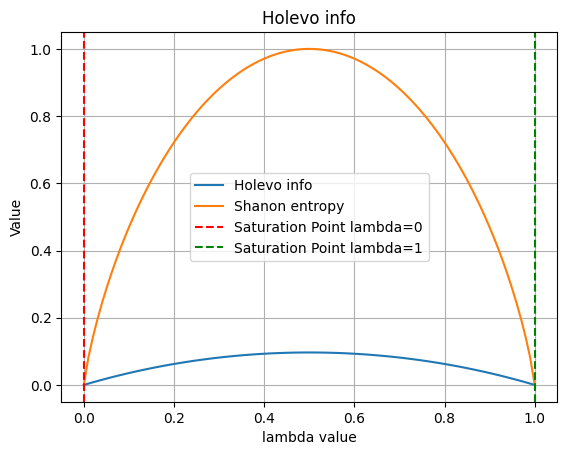

In [68]:
import numpy as np
from matplotlib import pyplot as plt

I = np.matrix([[1, 0],[0, 1]])
Y = np.matrix([[0, -1j],[1j, 0]])
Z = np.matrix([[1, 0],[0, -1]])

rho2 = 0.5 * (I + 0.5 * Y)
rho3 = 0.5 * (I + 0.5 * Z)

# Define lambda values
lambdas = np.linspace(0, 1, 100)

# Calculate Holevo info
holevo_info = []
inequality_values = []

for lam in lambdas:
    rho = lam * rho2 + (1 - lam) * rho3
    S_rho2 = - np.trace(rho2 * log2M(rho2)).real
    S_rho3 = - np.trace(rho3 * log2M(rho3)).real
    S_rho = - np.trace(rho * log2M(rho)).real
    J = S_rho - (lam * S_rho2 + (1 - lam) * S_rho3)

    if lam == 0 or lam == 1:
        inequality_value = 0
    else:
        inequality_value = - lam * np.log2(lam) - (1 - lam) * np.log2(1 - lam)
    holevo_info.append(J)
    inequality_values.append(inequality_value)

# Plot all the data
plt.plot(lambdas, holevo_info, label='Holevo info')
plt.plot(lambdas, inequality_values, label='Shanon entropy')
plt.xlabel('lambda value')
plt.ylabel('Value')
plt.title('Holevo info')
plt.axvline(x=0, color='r', linestyle='--', label=f'Saturation Point lambda=0')
plt.axvline(x=1, color='g', linestyle='--', label=f'Saturation Point lambda=1')
plt.legend()
plt.grid(True)
plt.show()